In [6]:
import numpy as np
import matplotlib.pyplot as plt

import pickle
import sys

from tqdm import tqdm_notebook

from nltk import ngrams

In [150]:
import itertools
from itertools import tee

import editdistance as ed

In [7]:
def plot_gr(gr, start=0, end=-1, log = False, all_ticks = False,  s=10):
    plt.figure(figsize=(s,s))
    if end == -1:
        end = gr.shape[0]
    if log:
        plt.imshow(np.log(gr[start:end,start:end] + 1))
    else:
        plt.imshow(gr[start:end,start:end])
    plt.colorbar()
    if all_ticks: 
        plt.xticks(np.arange(start,end))
        plt.yticks(np.arange(start,end))
    plt.show()

In [8]:
def plot_group(*args, s = 7):
    n = len(args) // 2
    
    plt.figure(figsize=(s,s))
    f, a = plt.subplots(1, n,figsize=(s,s))
    #f.set_figsize((s,s))
    for i in range(n):
        im = args[2*i]
        if args[2*i + 1]:
            im = np.log(im + 1)
        a[i].imshow(im)

    plt.show()

In [63]:
# Check randint
def generate_repeat(repeat_a, repeat_b):
    transition_pos = np.random.randint(0, len(repeat_a) + 1)
    return repeat_a[0:transition_pos] + repeat_b[transition_pos:]

In [120]:
class RepeatsDescr:
    def __init__(self, repeats):
        self.n = len(repeats)
        self.repeats = repeats
        self.repeat_to_n = dict(zip(self.repeats, np.arange(len(repeats))))
        self.n_to_repeat = dict(zip(np.arange(len(repeats)), self.repeats))
        self.mat = self._create_complementory_matrix()

    def add_repeat(self, repeat):
        self.repeats.append(repeat)
        self.repeat_to_n[repeat] = self.n
        self.n_to_repeat[self.n] = repeat
        self.n += 1
        self._update_complementory_matrix()
        
    def _create_complementory_matrix(self):
        mat = np.zeros((self.n, self.n))

        for r1, r2 in itertools.product(self.repeats, self.repeats):
            mat[self.repeat_to_n[r1]][self.repeat_to_n[r2]] = 1 - (ed.eval(r1,r2) / max(len(r1), len(r2)))
        return mat
    
    def _update_complementory_matrix(self):
        self.mat = np.pad(self.mat, ((0,1), (0,1)), mode = 'constant')
        
        for r in self.repeats:
            val = 1 - (ed.eval(r,repeats[-1]) / max(len(r), len(repeats[-1])))
            self.mat[self.repeat_to_n[r], self.repeat_to_n[repeats[-1]]] = val
            self.mat[self.repeat_to_n[repeats[-1]], self.repeat_to_n[r]] = val

In [121]:
repeats = ['aaaaaaaaaa',
           'aaaaaaaaab',
           'aaaaaaaabb']

repeats_descr = RepeatsDescr(repeats)

In [123]:
repeats_descr.add_repeat("aaaaaaabbb")

In [308]:
class Population:
    def __init__(self, init_population):
        self.curr_cassettes = len(init_population)
        total_len = sum([len(x) // 2 for x in init_population])
        self.p = np.zeros((total_len + len(init_population) + 1, 2)).astype(int) # len() stays for separators
        self.p[0] = -1
        self.last_cassette_end = 0
        
        for cassette in init_population:
            self._add_cassette(cassette)
            if V == 'DEBUG' or V == 'DEBUG_1':
                print(self.p, "\n")
        
    def _add_cassette(self, cassette):
        #last_cassette_end = np.where(self.p == -1)[0][-1]
        cassette = cassette + [-1]
        
        if len(cassette) % 2 == 1:
            cassette = cassette + [-1]
        
        if len(cassette) // 2 + 1  + self.last_cassette_end > self.p.shape[0]:
            self.p = np.pad(self.p, ((0, self.p.shape[0]), (0,0)), mode = 'constant')
        
        for i, (r, sp) in enumerate(zip(cassette[::2], cassette[1::2])):
            self.p[i + (self.last_cassette_end + 1), 0] = r
            self.p[i + (self.last_cassette_end + 1), 1] = sp

        self.curr_cassettes += 1
        self.last_cassette_end = np.where(self.p == -1)[0][-1]
        
    def add_cassettes(self, cassettes):
        for c in cassettes:
            self._add_cassette(c)
            
    def amplify(self, spacers_complementary_matrix, spacers_pool, direction = 1):
        last_cassette_end = np.where(self.p == -1)[0][-1]
        
        #p_comp_mat = np.zeros((self.las_cassette_end, spacers_complementary_matrix.shape[0]))
        p_comp_mat = spacers_complementary_matrix[self.p[:last_cassette_end, 0]]
        p_comp_mat[self.p[:last_cassette_end, 0] == -1, :] = 0 
        
        if V == 'DEBUG' or V == 'DEBUG_2':
            print(p_comp_mat)
        
        
        
    
         

In [309]:
V = 'DEBUG_2'

In [310]:
p_list = [[0,0, 0,1, 1,2, 0], [2,3, 0,4, 1]]
p = Population(p_list)

In [316]:
m = repeats_descr.mat

In [312]:
p.amplify(repeats_descr.mat, {})

[[0.  0.  0.  0. ]
 [1.  0.9 0.8 0.7]
 [1.  0.9 0.8 0.7]
 [0.9 1.  0.9 0.8]
 [1.  0.9 0.8 0.7]
 [0.8 0.9 1.  0.9]
 [1.  0.9 0.8 0.7]
 [0.9 1.  0.9 0.8]
 [0.9 1.  0.9 0.8]]


In [315]:
for x in p.p.flatten():
    print(x)

-1
-1
0
0
0
1
1
2
0
-1
2
3
0
4
1
-1
1
5
2
-1


In [317]:
m

array([[1. , 0.9, 0.8, 0.7],
       [0.9, 1. , 0.9, 0.8],
       [0.8, 0.9, 1. , 0.9],
       [0.7, 0.8, 0.9, 1. ]])

In [ ]:
np.random.choice(np.arange(12).reshape((3,4)), size = 4, p = 

In [267]:
def single_amplify(to_amplify, population=None, v = False):
    if population is None:
        population = [x for x in to_amplify]
    
    new = []
    for chain in to_amplify:
        start = np.random.randint(0, len(chain) - 1)
        stop = False
        end = np.random.randint(start + 1, len(chain))

        new_chain = []
        pointer = start

        while not stop:
            switch = np.random.rand() < SWITCH_PROB

            if v:
                print(chain, new_chain, switch)
            if switch:
                chain = population[np.random.randint(0, len(population))]
                pointer = np.random.randint(1, len(chain))

            if np.random.rand() < STOP_PROB:
                stop = True

            if len(new_chain) >= end - start:
                stop = True

            if pointer < len(chain):
                new_chain.append(chain[pointer])
            else:
                stop = True

            pointer += 1 

        if len(new_chain) > 2:
            new.append(new_chain)
    
    return [x[::-1] for x in new]

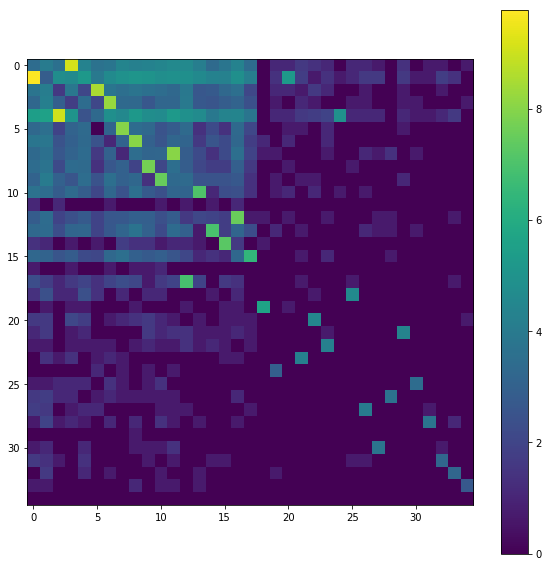

In [126]:
plot_gr(np.load("../../data/graphs/ES3_22.npy")[:35,:35], log = 1)

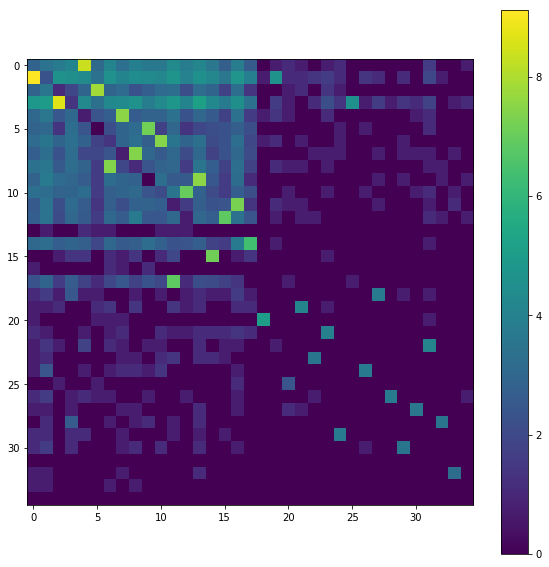

In [127]:
plot_gr(np.load("../../data/graphs/ES4_22.npy")[:35,:35], log = 1)